#### Suppression des duplicates

In [4]:
import hashlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
import numpy as np

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        return md5(f.read()).hexdigest()

In [7]:
import os

In [8]:
os.getcwd()

'C:\\Users\\Administrateur\\Desktop\\Projet Info 2020\\test_of_delete'

In [9]:
file_list = os.listdir()
print(len(file_list))

52


In [10]:
import hashlib, os
duplicates = []
hash_keys = dict()
for index, filename in  enumerate(os.listdir('.')):  #listdir('.') = current directory
    if os.path.isfile(filename):
        with open(filename, 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys: 
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))

In [11]:
duplicates

[(8, 3),
 (9, 4),
 (10, 5),
 (11, 6),
 (12, 7),
 (14, 3),
 (15, 2),
 (20, 16),
 (21, 19),
 (23, 19),
 (24, 22)]

<ipython-input-16-92637b42ca4c>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121),plt.imshow(plt.imread(file_list[file_indexes[1]]))
<ipython-input-16-92637b42ca4c>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122),plt.imshow(plt.imread(file_list[file_indexes[0]]))


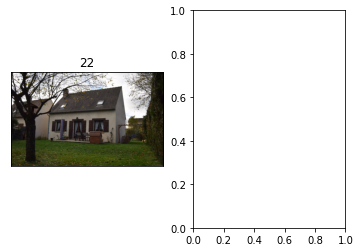

In [16]:
for file_indexes in duplicates[:30]:
    try:
    
        plt.subplot(121),plt.imshow(plt.imread(file_list[file_indexes[1]]))
        plt.title(file_indexes[1]), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(plt.imread(file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [15]:
for index in duplicates:
    os.remove(file_list[index[0]])

#### Autres traitement : Bruit et image initule

In [21]:
import matplotlib.pyplot as plt

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise


original = plt.imread(img_name)

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True,
                                rescale_sigma=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()

NameError: name 'img_name' is not defined

#### Classification des differents images en Salle bain, chambre, cuisine, salon Exterieur Interieur

In [18]:
pip install -r Windows/requirements_cpu_windows.txt
pip install torch==1.2.0+cpu torchvision==0.4.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

SyntaxError: invalid syntax (<ipython-input-18-d343ddcfd2dc>, line 1)

In [26]:
pd.Series(['SSD_1_Photo_1.jpeg', 'SSD_3_Photo_1.jpeg', np.nan]).str.replace('_Photo.{1,}', 'ba', regex=True)

0    SSD_1ba
1    SSD_3ba
2        NaN
dtype: object

In [23]:
import pandas as pd